## **TASK :**

**Boston Housing DataSet** is one of the DataSets available in **sklearn**. Our task is to :
1. **Code Gradient Descent for N features** and come up with predictions**(Market Value of the houses)** for the Boston Housing DataSet.
2. Try and test the accuracy with  **various combinations of Learning Rates and Number of Iterations**.
3. **Try using Feature Scaling**, and see if it helps in getting better results or not. 

## **UNDERSTANDING THE DATA SET :**
> ### ⭐ **BOSTON HOUSING DATASET :**
*A DataSet derived from the information collected by the **U.S. Census Service** concerning **housing in the area of Boston Mass**.*

![alt text](https://www.langan.com/wp-content/uploads/2019/02/Boston-996x554.jpg)




## **IMPORTING ALL THE REQUIRED MODULES/LIBRARIES :**

In [ ]:
import pandas as pd                                   # For Data Loading, Cleaning, Analysis and Manipulation.
import numpy as np                                    # For Mathematical Calculations and Equation Solving.

from sklearn import datasets                          # For loading the Boston DataSet. 
from sklearn import preprocessing                     # For Feature Scaling.
from sklearn import model_selection                   # For train_test_split().
from sklearn.linear_model import LinearRegression     # For sklearn's LinearRegression. 

# For Data Visualization :
import matplotlib.pyplot as plt
import seaborn as sns

## **LOADING THE DATASET :**

In [ ]:
boston = datasets.load_boston()          # Loading the Boston DataSet.
X = boston.data                          # X/ INPUTS/ Predictor Variables/ Independent Variables.  
Y = boston.target                        # Y/ OUTPUT/ Target Variable/ Dependent Variable.

# Performing the train_test_split :
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Creating a DataFrame from X_train :
df = pd.DataFrame(X_train, columns = boston.feature_names)
df.head()                                # Looking at the first 5 entries.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
3,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
4,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79


In [ ]:
df.info()                                # A brief information/summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  B        379 non-null    float64
 12  LSTAT    379 non-null    float64
dtypes: float64(13)
memory usage: 38.6 KB


So, We are having the **training_data corresponding to 379 houses in the area of Boston Mass**.

We are having **13 columns/features** out of which **all the 13 are of type float(8 bit)** and **none of the column contains any Nulls/NaNs**.



## **UNDERSTANDING THE MEANING OF EACH FEATURE/COLUMN :**

Number of Instances : ***379***.

Number of Attributes: ***13 numeric/categorical predictive***.

***Predictor Variables :***
> 1. ***CRIM :*** **per capita crime rate** by town.
2. ***ZN :***       **proportion of residential land zoned for lots** over 25,000 sq.ft.
3. ***INDUS :***    **proportion of non-retail business acres** per town.
4. ***CHAS :*** Charles River dummy variable **(= 1 if tract bounds river; 0 otherwise)**.
5. ***NOX :***      **nitric oxides concentration** (parts per 10 million).
6. ***RM :***       average number of **rooms per dwelling**.
7. ***AGE :***      proportion of **owner-occupied units built prior to 1940**.
8. ***DIS :***      weighted distances to five Boston employment centres.
9. ***RAD :***      index of **accessibility to radial highways**.
10. ***TAX :***      **full-value property-tax rate** per $10,000
11. ***PTRATIO :*** **pupil-teacher ratio** by town.
12. ***B :***        **1000(Bk - 0.63)^2** where Bk is the proportion of blacks **(people of African American descent)** by town.
13. ***LSTAT :***    % lower status of the population.

***Target Variable :***

***MEDV :*** Median value of owner-occupied homes in $1000s.



## **EXPLORATORY DATA ANALYSIS :**

### **ANALYZING THE SIGNIFICANCE OF EACH FEATURE/COLUMN :**

We are using the **Linear Regression Algorithm** here, and for finding the optimal coeficient/weights, We will be using **Gradient Descent**.

Since, **Linear Regression assumes that the Target Variable is linearly dependent over each feature**, So it's better to look at **Upto what degree/extent is our Target Variable linearly dependent over each of the Predictor Variables**. 

The best way to look at this is to find the **Correlation Coefficient(r)** between each of the Predictor Variables(X) and the Target Variable(Y).  

In [ ]:
df['Y'] = Y_train                    # Adding the Target Variable into our DataFrame.

# Getting the Correlation Matrix for the DataFrame as :
df.corr()                            

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
CRIM,1.000000,-0.201351,0.391770,-0.052303,0.429032,-0.185084,0.341526,-0.368217,0.618816,0.571454,0.273101,-0.311757,0.459357,-0.404941
ZN,-0.201351,1.000000,-0.528755,-0.052096,-0.524911,0.327201,-0.584627,0.660710,-0.313989,-0.327254,-0.383914,0.168671,-0.428367,0.394188
INDUS,0.391770,-0.528755,1.000000,0.046481,0.755708,-0.395119,0.635201,-0.696408,0.578671,0.729234,0.377993,-0.339950,0.616902,-0.527459
CHAS,-0.052303,-0.052096,0.046481,1.000000,0.059083,0.081925,0.068587,-0.087921,0.007005,-0.027192,-0.092955,0.075155,-0.045924,0.155349
NOX,0.429032,-0.524911,0.755708,0.059083,1.000000,-0.287367,0.743524,-0.773083,0.628727,0.686920,0.175481,-0.376619,0.599609,-0.452686
RM,-0.185084,0.327201,-0.395119,0.081925,-0.287367,1.000000,-0.248617,0.193052,-0.174508,-0.272416,-0.370481,0.131769,-0.612997,0.698227
AGE,0.341526,-0.584627,0.635201,0.068587,0.743524,-0.248617,1.000000,-0.760456,0.444960,0.508152,0.237848,-0.255566,0.615801,-0.412531
DIS,-0.368217,0.660710,-0.696408,-0.087921,-0.773083,0.193052,-0.760456,1.000000,-0.474487,-0.532434,-0.174499,0.262156,-0.516540,0.275655
RAD,0.618816,-0.313989,0.578671,0.007005,0.628727,-0.174508,0.444960,-0.474487,1.000000,0.902384,0.443599,-0.436661,0.468507,-0.415387
TAX,0.571454,-0.327254,0.729234,-0.027192,0.686920,-0.272416,0.508152,-0.532434,0.902384,1.000000,0.449566,-0.427663,0.540966,-0.507594


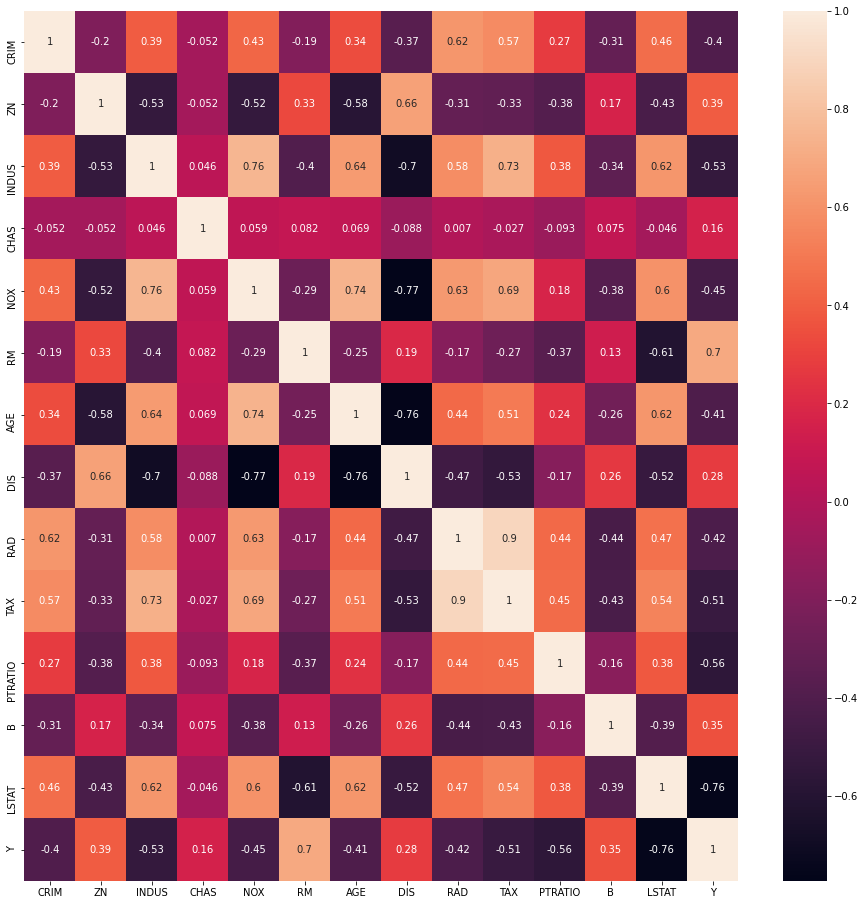

In [ ]:
# Drawing a Heat Map for the Correlation Matrix :

fig = plt.figure(figsize = (16,16))

fig.add_subplot(1,1,1)
sns.heatmap(df.corr(), annot = True)    # annot = True, to print the values of the Correlation Coefficients.

plt.show()

In [ ]:
# Getting some statistical insights from the numerical columns :
 
df.describe()        

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.412736,11.861478,11.083509,0.065963,0.556160,6.312683,68.735620,3.781929,9.411609,403.226913,18.489710,358.808232,12.546280,22.608707
std,8.258225,23.810122,7.021496,0.248546,0.116179,0.693391,28.214667,2.094931,8.676092,171.319579,2.191971,89.169412,7.202756,9.248455
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.075200,0.000000,5.040000,0.000000,0.449000,5.904500,45.250000,2.100350,4.000000,276.000000,17.400000,376.125000,6.700000,16.700000
50%,0.263630,0.000000,8.560000,0.000000,0.538000,6.229000,78.100000,3.215700,5.000000,329.000000,19.100000,391.930000,11.220000,21.400000
75%,3.397665,20.000000,18.100000,0.000000,0.631000,6.676000,93.800000,5.116700,24.000000,666.000000,20.200000,395.960000,17.030000,25.250000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


**Except CHAS all the other features/columns are numerical columns. CHAS is a categorical feature/column with values 0 and 1.** 

#### ***CRIM :***

It seems to be very obvious that **an increase in the Crime Rate, should result in a decrease in the Market Values**, and **a decrease in the Crime Rate, should result in an Increase in the Market Values**. Hence the **movement of the 2 variables should be in opposite directions**.

*The above saying seems to be correct as the **Correlation Coefficient between CRIM and Y is negative (-0.4)**. Hence, the 2 **variables are having a negative co-movement**.*

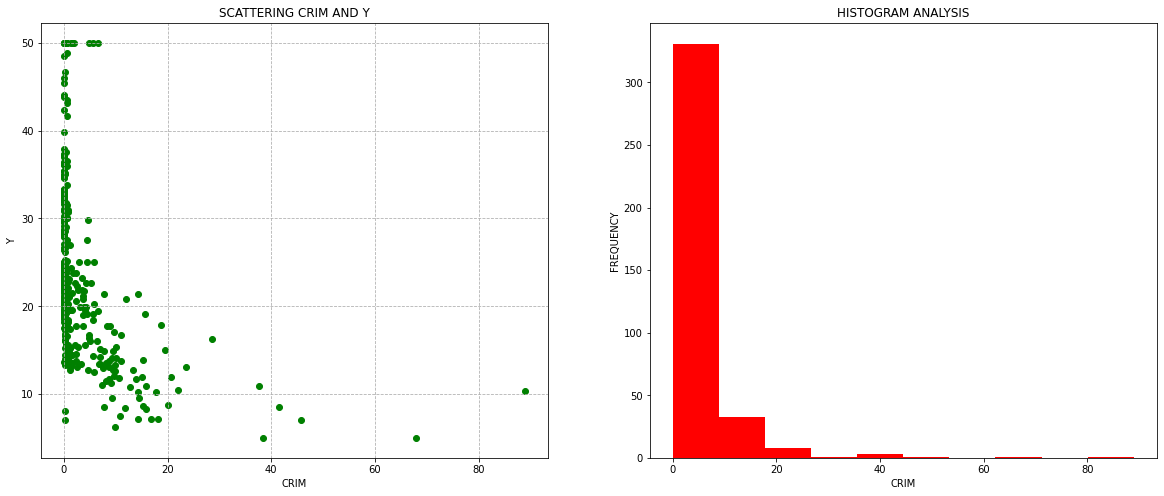

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Scattering CRIM and Y :
ax[0].scatter(df['CRIM'], df['Y'], marker = 'o', color = 'green')
ax[0].grid(ls ='--')
ax[0].set_xlabel('CRIM')
ax[0].set_ylabel('Y')
ax[0].set_title('SCATTERING CRIM AND Y')

# HISTOGRAM ANALYSIS :
ax[1].hist(df['CRIM'], color = 'red')
ax[1].set_xlabel('CRIM')
ax[1].set_ylabel('FREQUENCY')
ax[1].set_title("HISTOGRAM ANALYSIS")

plt.show()

We can clearly observe that **more than 300 of the data points are having the Crime Rate in between 0 - 10**.

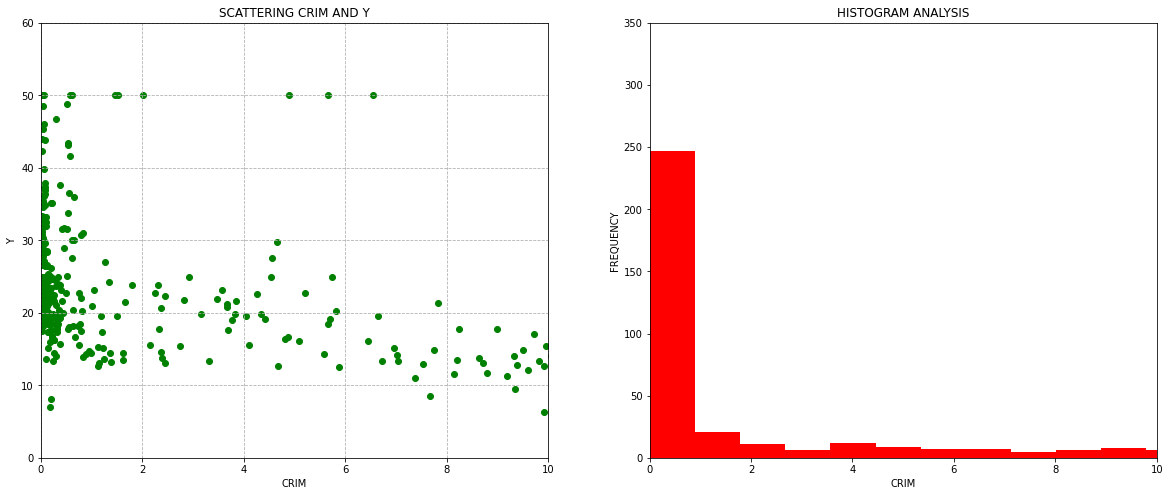

In [ ]:
# Zooming into the range(0,10) :

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

ax[0].scatter(df['CRIM'], df['Y'], marker = 'o', color = 'green')
ax[0].grid(ls ='--')
ax[0].set_xlabel('CRIM')
ax[0].set_ylabel('Y')
ax[0].set_title('SCATTERING CRIM AND Y')
ax[0].axis([0,10,0,60])

ax[1].hist(df['CRIM'], bins = 100, color = 'red')
ax[1].set_xlabel('CRIM')
ax[1].set_ylabel('FREQUENCY')
ax[1].set_title("HISTOGRAM ANALYSIS")
ax[1].axis([0,10,0,350])

plt.show()

We can observe **a fall/decrease in Y(Market Value), with an increase in the Crime Rate**. 

***There are a few exceptions around the Crime Rate 1.5 - 2.0 and 4.5 - 6.5, these could be our outliers or is because of the effect of other features***.

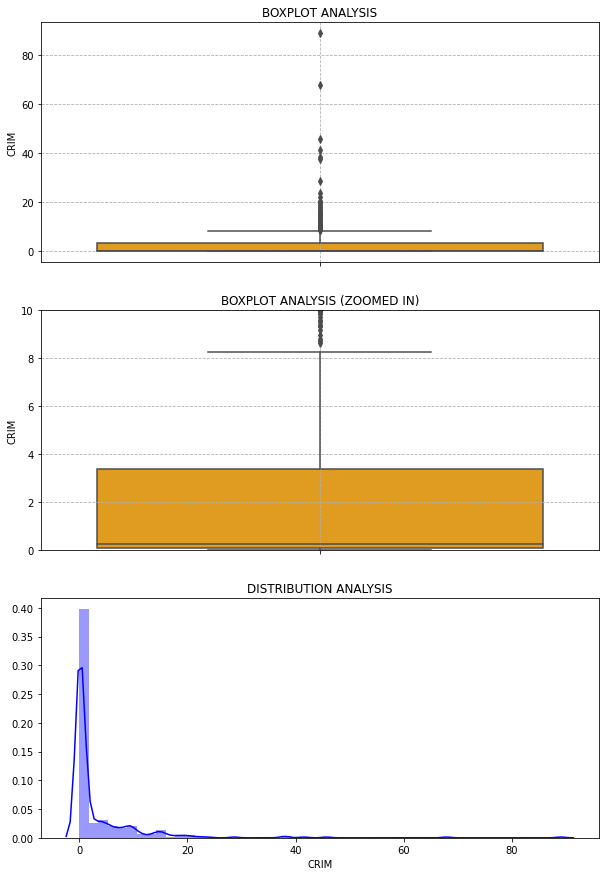

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = ((10,15)))

# Boxplot :
sns.boxplot(y = df['CRIM'], ax = ax[0], color = 'orange')
ax[0].grid(ls ='--')
ax[0].set_title('BOXPLOT ANALYSIS')

# Zoomed in Boxplot :
sns.boxplot(y = df['CRIM'], ax = ax[1], color = 'orange')
ax[1].grid(ls = '--')
ax[1].set_title("BOXPLOT ANALYSIS (ZOOMED IN)")
ax[1].set_ylim([0,10])

# Distribution :
sns.distplot(df['CRIM'], ax = ax[2], color = 'blue')
ax[2].set_title('DISTRIBUTION ANALYSIS')

plt.show()

The **length of the Lower Wisker is much small compared to the Upper Wisker**. This shows that the **distribution is right skewed**. We can observe the same in the distplot. 

We an observe **outliers above Crime Rate > around 8.2**, hence the **cases we discussed above(exceptions around the Crime Rate 1.5 - 2.0 and 4.5 - 6.5) is probably due to the effect of the other features.**   

#### ***ZN :***

There is a **Weak Positive value of Correlation Coefficient(r) between ZN and Y (0.39)** i.e **both the variables are having a positive co-movement**. 

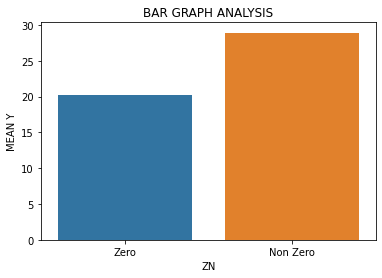

In [ ]:
# Plotting a BarGraph between Mean Market Value VS ZN(Zero and Non Zero) :

values = ['Zero', 'Non Zero']
frequencies = [df[df['ZN'] == 0]['Y'].mean(), df[df['ZN'] != 0]['Y'].mean()]

sns.barplot(values, frequencies)
plt.xlabel('ZN')
plt.ylabel('MEAN Y')
plt.title('BAR GRAPH ANALYSIS')

plt.show()

Hence, We can clearly say that the **average Market Value, for Non Zero ZN is greater than the average Market Value for Zero ZN**.

#### ***INDUS :***

There is a **Moderate Negative value of Correlation Coefficient(r)between INDUS and Y (-0.53)** i.e the **movement of both the variables are in opposite directions**.

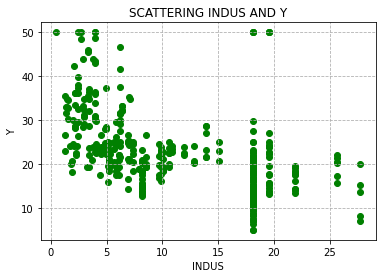

In [ ]:
# Scattering INDUS and Y:

plt.scatter(df['INDUS'], df['Y'], color = 'green')
plt.xlabel('INDUS')
plt.ylabel('Y')
plt.title('SCATTERING INDUS AND Y')
plt.grid(ls = '--')

plt.show()

***We can observe a fall in Y, with increasing INDUS values.(Negative co-movement)***

#### ***CHAS (Categorical Feature) :***

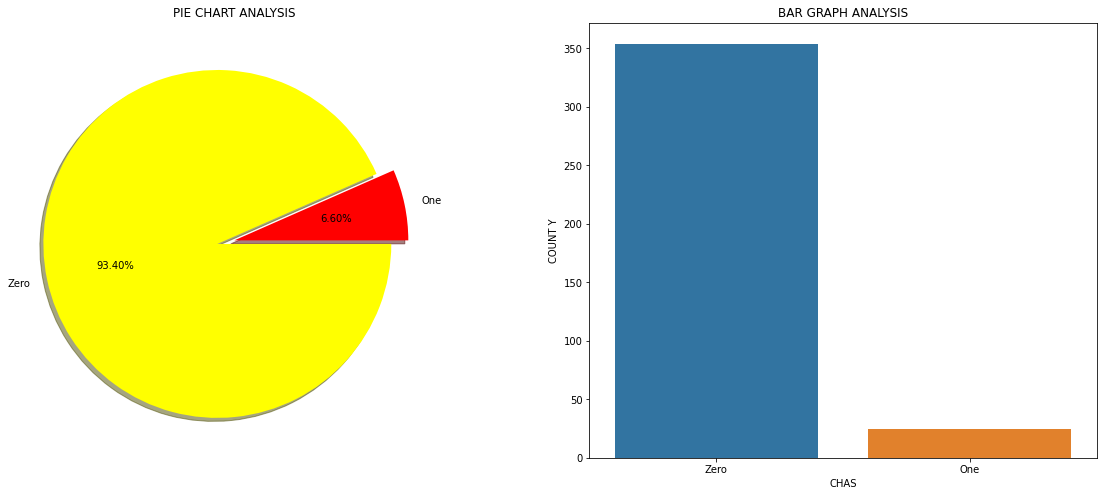

In [ ]:
values = ['Zero', 'One']
frequencies = [df[df['CHAS'] == 0].shape[0], df[df['CHAS'] == 1].shape[0]]

fig = plt.figure(figsize = (20,8))

fig.add_subplot(1,2,1)
plt.pie(frequencies,labels=values,colors=['yellow','red'],explode=[0.1,0],counterclock=False,autopct='%.2f%%',shadow=True)
plt.title('PIE CHART ANALYSIS')

fig.add_subplot(1,2,2)
sns.barplot(values, frequencies)
plt.xlabel('CHAS')
plt.ylabel('COUNT Y')
plt.title('BAR GRAPH ANALYSIS')

plt.show()

So, We can see that **93.40% of the data points have CHAS = 0**.

#### ***NOX :***

**One can definitely assume that the movement of the 2 variables, NOX(Nitric Oxide Concentration/indicating pollution levels) and Y(Market Value) should be in opposite directions, i.e an increase in one and the decrease in the other and vice-versa.**

*The above saying seems to be correct as, we are having a **Moderate Negative value of Correlation Coefficient(r) (-0.45) between NOX and Y**.*

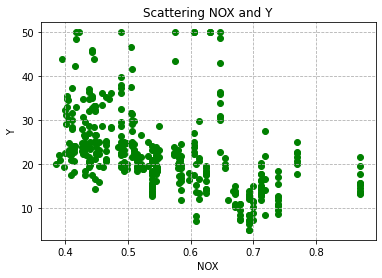

In [ ]:
# Scattering NOX and Y :

plt.scatter(df['NOX'], df['Y'], color = 'green')
plt.title('Scattering NOX and Y')
plt.xlabel('NOX')
plt.ylabel('Y')
plt.grid(ls = '--')
plt.show()

**We can observe a fall in Y, with increasing NOX, with a few exceptions**.

#### **RM :**

There is a **Strong Positive value of Correlation Coefficient(r) between RM and Y (0.7)**, which means that both the variables are having a **strong positive co-movement**.

Hence, We can say that **Y is strongly dependent(linearly) over RM**.

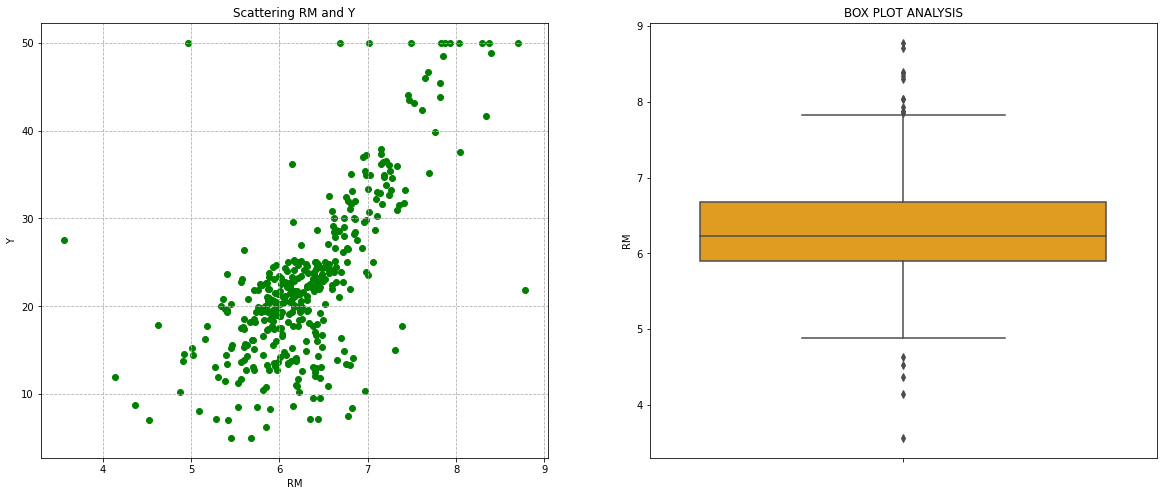

In [ ]:
# Scattering RM and Y :
fig = plt.figure(figsize = (20,8))
fig.add_subplot(1,2,1)
plt.scatter(df['RM'], df['Y'], color = 'green')
plt.title('Scattering RM and Y')
plt.xlabel('RM')
plt.ylabel('Y')
plt.grid(ls = '--')

# Box plot :
fig.add_subplot(1,2,2)
sns.boxplot(y = df['RM'], color = 'orange')
plt.title('BOX PLOT ANALYSIS')

plt.show()

We, can clearly observe **an increase/rise in Y with increasing RM**, with **a few outliers below 4.8 and above 7.8**.

#### **AGE :**

There is a **Moderate Negative value of Correlation Coefficient(r) between AGE and Y (-0.41)** i.e both the variables are having a **negative co-movement**. 

*It seems to be fine as **old houses are generally having market values lesser than the new ones**. But exception do exist.*

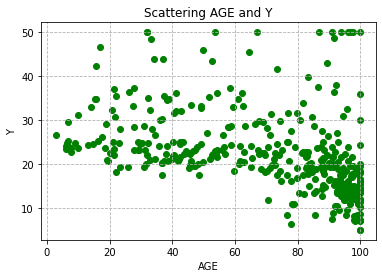

In [ ]:
# Scattering AGE and Y :

plt.scatter(df['AGE'], df['Y'], color = 'green')
plt.title('Scattering AGE and Y')
plt.xlabel('AGE')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

We can observe a **fall in Y with increasing AGE values, with a few exceptions as well**.

#### **DIS :**


There is a **Weak Positive value of Correlation Coefficient(r) between the variables DIS and Y (0.28)** i.e both the **variables are having a positive co-movement**.

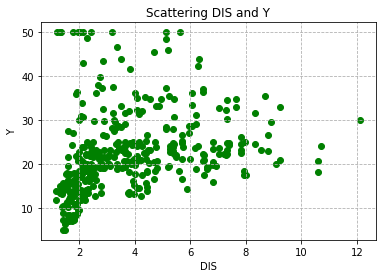

In [ ]:
# Scattering DIS and Y :

plt.scatter(df['DIS'], df['Y'], color = 'green')
plt.title('Scattering DIS and Y')
plt.xlabel('DIS')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

#### **RAD :**

A **Moderate Negative value of Correlation Coefficient(r) exists between RAD and Y (-0.42)** i.e **both the variables are having a negative co-movement**.

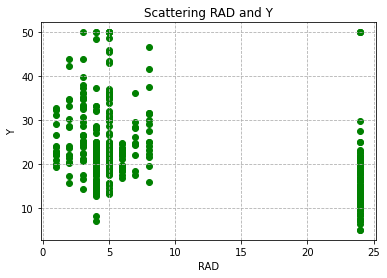

In [ ]:
# Scattering RAD and Y :

plt.scatter(df['RAD'], df['Y'], color = 'green')
plt.title('Scattering RAD and Y')
plt.xlabel('RAD')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

#### **TAX :**

A **Decent Negative value of Correlation Coefficient(r) exists between TAX and Y (-0.51)** i.e both the **variables are having a negative co-movement**.  

This seeems to be fine as **increasing Tax Rates, would definitely affect the Market Values**.

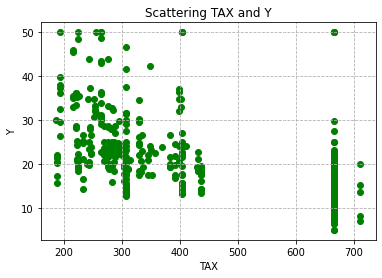

In [ ]:
# Scattering TAX and Y :

plt.scatter(df['TAX'], df['Y'], color = 'green')
plt.title('Scattering TAX and Y')
plt.xlabel('TAX')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

#### **PTRATIO :**

A **Decent Negative value of Correlation Coefficient(r) exists between PTRATIO and Y (-0.56)**, i.e both the **variables are having a negative co-movement**.

*This seems to be very much correct as **increasing Pupil to Teacher Ratio means, more number of Pupils(Students) per Teacher, i.e lesser number of Teachers** which will definitely hit/affect the Market Values.*

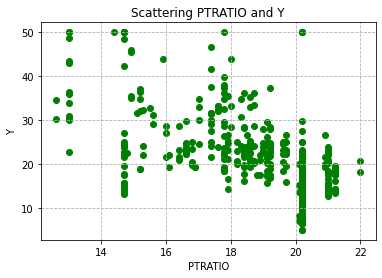

In [ ]:
# Scattering PTRATIO and Y :

plt.scatter(df['PTRATIO'], df['Y'], color = 'green')
plt.title('Scattering PTRATIO and Y')
plt.xlabel('PTRATIO')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

#### **B :**

A **Weak Positive value of Correlation Coefficient(r) exists between B and Y (0.35)** i.e both the **variables are having a positive co-movement**.

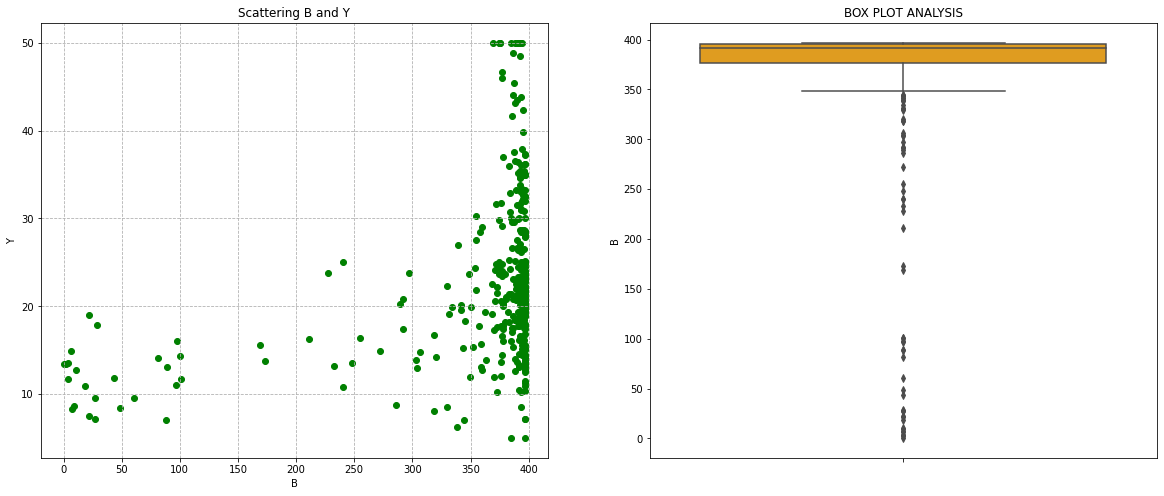

In [ ]:
# Scattering B and Y :
fig = plt.figure(figsize = (20,8))
fig.add_subplot(1,2,1)
plt.scatter(df['B'], df['Y'], color = 'green')
plt.title('Scattering B and Y')
plt.xlabel('B')
plt.ylabel('Y')
plt.grid(ls = '--')

# Box plot :
fig.add_subplot(1,2,2)
sns.boxplot(y = df['B'], color = 'orange')
plt.title('BOX PLOT ANALYSIS')

plt.show()

We can observe **a lot of outliers in the boxplot** and the **distribution of df['B'] seems to be very much left skewed**. 

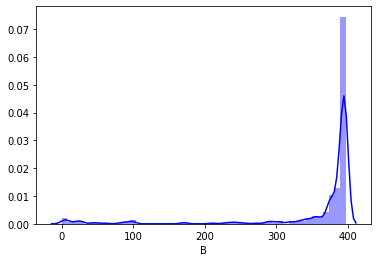

In [ ]:
sns.distplot(df['B'], color = 'blue')

plt.show()

#### **LSTAT :**

A **Strong Negative value of Correlation Coefficient(r) exists between LSTAT and Y (-0.76)** i.e both the **variables are having a negative co-movement**.

This means **larger the % of the Lower Status Population in the area, lesser the Market Values of the houses in the area**. 

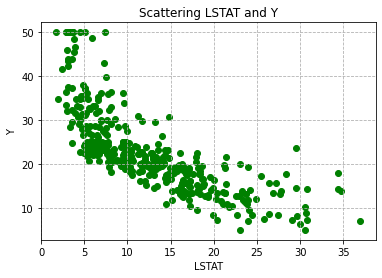

In [ ]:
# Scattering LSTAT and Y :

plt.scatter(df['LSTAT'], df['Y'], color = 'green')
plt.title('Scattering LSTAT and Y')
plt.xlabel('LSTAT')
plt.ylabel('Y')
plt.grid(ls = '--')

plt.show()

## **GRADIENT DESCENT :**

*Since we are having **only 379 training data points which are not too large**, So we will be using the **Batch Gradient Descent** to find out the optimal coefficients/weights.*

### **DEFINING ALL THE REQUIRED FUNCTIONS :**

In [ ]:
# A function that takes in the training data(with the all ones Column) and the coefficients array and returns the cost.
def cost(X_train, Y_train, coef_array):
  return ((Y_train - (X_train @ coef_array))**2).mean()

# A function that predicts the Output for a given set/array of Inputs. 
def predict(X, coef_array):
  return X @ coef_array

# A function that finds the COD(Coefficient Of Determination).
def score(X, Y, coef_array):
  Y_predicted = predict(X, coef_array)
  u = ((Y - Y_predicted)**2).sum()
  v = ((Y - Y.mean())**2).sum()
  return 1 - (u/v)

# A function to implement the Batch Gradient Descent.
def batchGD(X, Y_train, learning_rate, num_iterations, print_cost = False):

  M, N = X.shape
  
  X_train = X.copy()
  allOnes = np.ones((len(Y_train), 1))               
  X_train = np.hstack([X_train, allOnes]) # Concatenating the allOnes column to X_train(for the intercept value).

  np.random.seed(123)
  coef_array = np.random.uniform(-10.0, 10.0, N + 1)
  cost_array = []

  for x in range(num_iterations):
    cost_ = cost(X_train, Y_train, coef_array)
    cost_array.append(cost_)
    if print_cost:
      print("Iteration :", x + 1, '\t', "Cost : " + '%.4f'%cost_)
    slope_array = np.zeros(N + 1)
    for i in range(M):
      f_xi = (coef_array * X_train[i]).sum()
      y_i = Y_train[i]
      for j in range(N + 1):
        slope_array[j] += (-2/M) * (y_i - f_xi) * X_train[i,j]

    coef_array -= (learning_rate * slope_array)

  return coef_array, cost_array 

### **WITHOUT FEATURE SCALING :**

In [ ]:
# Calling the batchGD function and printing the iteration wise costs :

coef_array, cost_array = batchGD(X_train, Y_train, 0.000001, 10, True)

Iteration : 1 	 Cost : 1881279.1456
Iteration : 2 	 Cost : 681293.0133
Iteration : 3 	 Cost : 477863.9417
Iteration : 4 	 Cost : 419789.1522
Iteration : 5 	 Cost : 385137.3545
Iteration : 6 	 Cost : 356237.3940
Iteration : 7 	 Cost : 330342.5021
Iteration : 8 	 Cost : 306859.3925
Iteration : 9 	 Cost : 285521.0340
Iteration : 10 	 Cost : 266123.7858


**We can check, that any learning_rate below 0.000001 is resulting in an overshoot**. For this learning_rate, the Gradient Descent Algorithm is getting converged, but **since the learning_rate is very small, hence the number of iterations required to reach the optimal cost would be very large**.  

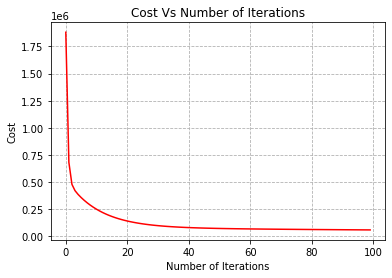

In [ ]:
# Plotting a Graph between the Cost Value and the Number of iterations(100) : 

coef_array, cost_array = batchGD(X_train, Y_train, 0.000001, 100, False)

plt.plot(np.arange(len(cost_array)), cost_array, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')

plt.show()

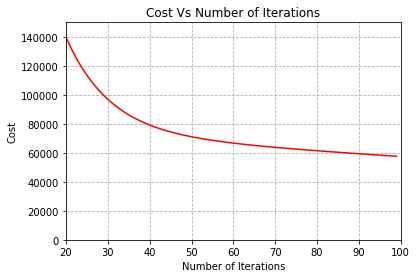

In [ ]:
# Zooming-In to the graph :

plt.plot(np.arange(len(cost_array)), cost_array, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.axis([20,100, 0, 150000])

plt.show()

**We can observe that starting from 18,81,279.1456 we have reduced our cost to somewhere around 60,000 in just 100 iterations.**


### **WITH FEATURE SCALING :**

#### **WITH STANDARDIZATION :**

In [ ]:
std_scaler = preprocessing.StandardScaler()

X_train_standardized = std_scaler.fit_transform(X_train)

In [ ]:
coef_array_standardized, cost_array_standardized = batchGD(X_train_standardized, Y_train, 0.1, 10, True)

Iteration : 1 	 Cost : 1206.2690
Iteration : 2 	 Cost : 745.9578
Iteration : 3 	 Cost : 494.4749
Iteration : 4 	 Cost : 334.7242
Iteration : 5 	 Cost : 231.5744
Iteration : 6 	 Cost : 164.5561
Iteration : 7 	 Cost : 120.7234
Iteration : 8 	 Cost : 91.8192
Iteration : 9 	 Cost : 72.5628
Iteration : 10 	 Cost : 59.5688


**Drastic changes can be seen by using Standardization on our data. We are able to reach a cost of 59 in a mere 10 iterations with a significantly higher value of learning_rate.**

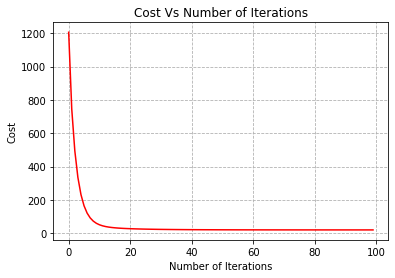

In [ ]:
# Plotting a Graph between the Cost Value and the Number of iterations(100) :

coef_array_standardized, cost_array_standardized = batchGD(X_train_standardized, Y_train, 0.1, 100)

plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')

plt.show()

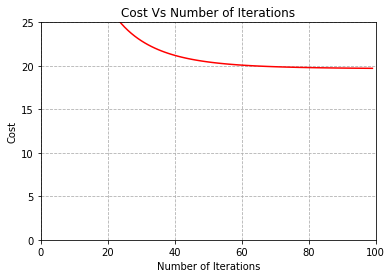

In [ ]:
# Zooming-In to the graph :

plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.axis([0, 100, 0, 25])

plt.show()

**So, We can clearly observe that we have achieved a stable value of the cost around 19-20 within a mere 60 iterations.**

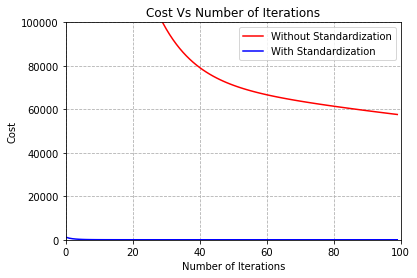

In [ ]:
# Comparing the Costs(With and Without Standardization) :

plt.plot(np.arange(len(cost_array)), cost_array, color = 'red', label = 'Without Standardization')
plt.plot(np.arange(len(cost_array_standardized)),  cost_array_standardized, color = 'blue', label = 'With Standardization')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.legend(loc = 'upper right')
plt.axis([0, 100, 0, 100000])

plt.show()

**One can clearly observe that the scale required to represent the 2 costs/plots is so different that on the current scale the Costs with standardization appear almost 0 throughout**.

*So, Now one can imagine of the advantage of Feature Scaling in Gradient Descent based algorithms.*

#### **WITH NORMALIZATION :**

In [ ]:
minmax_scaler = preprocessing.MinMaxScaler()

X_train_normalized = minmax_scaler.fit_transform(X_train)

In [ ]:
coef_array_normalized, cost_array_normalized = batchGD(X_train_normalized, Y_train, 0.1, 10, True)

Iteration : 1 	 Cost : 714.7686
Iteration : 2 	 Cost : 172.3348
Iteration : 3 	 Cost : 130.5609
Iteration : 4 	 Cost : 119.5997
Iteration : 5 	 Cost : 111.5315
Iteration : 6 	 Cost : 104.5633
Iteration : 7 	 Cost : 98.4647
Iteration : 8 	 Cost : 93.1146
Iteration : 9 	 Cost : 88.4129
Iteration : 10 	 Cost : 84.2732


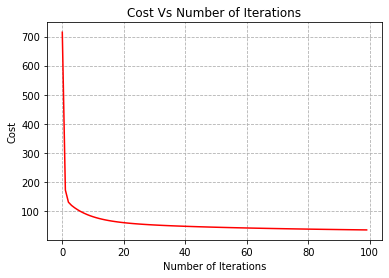

In [ ]:
# Plotting a Graph between the Cost Value and the Number of iterations(100) :

coef_array_normalized, cost_array_normalized = batchGD(X_train_normalized, Y_train, 0.1, 100)

plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')

plt.show()

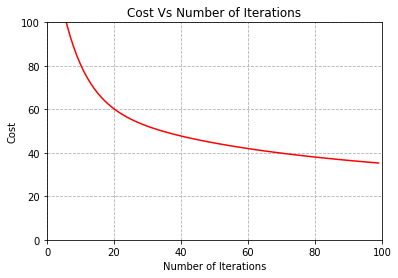

In [ ]:
# Zooming-In to the Graph :

plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.axis([0, 100, 0, 100])

plt.show()

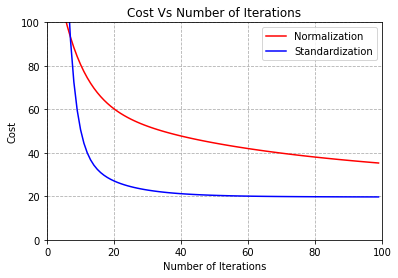

In [ ]:
# Comapring the Costs(With Standardization and With Normalization) :

plt.plot(np.arange(len(cost_array_normalized)), cost_array_normalized, color = 'red', label = 'Normalization')
plt.plot(np.arange(len(cost_array_standardized)), cost_array_standardized, color = 'blue', label = 'Standardization')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.axis([0, 100, 0, 100])
plt.legend(loc = 'upper right')

plt.show()

## **MAKING PREDICTIONS :**

In [ ]:
std_scaler = preprocessing.StandardScaler()
X_train_standardized = std_scaler.fit_transform(X_train)
X_test_standardized = std_scaler.transform(X_test)

allOnes = np.ones((len(X_test), 1))
X_test_standardized_1 = np.hstack([X_test_standardized, allOnes])

coef_array_standardized, cost_array_standardized = batchGD(X_train_standardized, Y_train, 0.1, 100)

Y_predicted_batchGD = predict(X_test_standardized_1, coef_array_standardized)
print(Y_predicted_batchGD)

[25.65505655 23.37146364 29.0671381  11.91647605 21.48782607 19.66290499
 20.17391112 21.40730409 18.80339373 20.22835346  5.46370095 15.89829593
 16.93423504  5.17832791 40.12364727 32.51715592 22.06137868 36.75817326
 31.03967727 23.23268909 24.9389994  24.24799482 20.83785627 30.04110176
 22.28725783  9.54120411 17.85864334 18.36249372 35.97978249 21.02990679
 17.89282481 17.67771328 19.91992149 23.68552853 29.03587174 19.35169409
 10.94053141 24.47837848 17.08073558 14.87738463 25.87257051 20.70111757
 23.02586647 15.00520785 24.04641341 25.15415228 19.58017952 23.26208268
  9.87456306 24.72121352 21.32866576 17.63591641 24.23634841 30.53303589
 13.4954445  21.54464226 20.84293854 16.04681645 13.93188548 22.01496491
 18.33289925 21.65948947 32.75519262 31.11930653 17.40655438 32.8447882
 18.55556669 19.50613163 18.61160915 22.81970314 22.89433991 24.11247239
 30.53078384 29.1793388  25.57023457  4.83540794 36.8366352  23.6875624
 27.4853058  19.51805055 28.4347468  19.36336319 18.6

In [ ]:
print('SCORE ON TESTING DATA :', score(X_test_standardized_1, Y_test, coef_array_standardized))

SCORE ON TESTING DATA : 0.6297682175404027


In [ ]:
alg = LinearRegression()

alg.fit(X_train_standardized, Y_train)

Y_predicted_LR = alg.predict(X_test_standardized)

print(Y_predicted_LR)

[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147448 18.

In [ ]:
print('SCORE ON TESTING DATA :', alg.score(X_test_standardized, Y_test))

SCORE ON TESTING DATA : 0.635463843320213


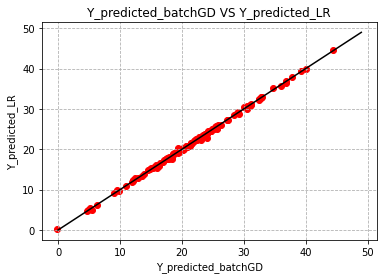

In [ ]:
plt.scatter(Y_predicted_batchGD, Y_predicted_LR, marker = 'o', color = 'red')
x = np.arange(50)
plt.plot(x, x, color = 'black')
plt.xlabel('Y_predicted_batchGD')
plt.ylabel('Y_predicted_LR')
plt.title('Y_predicted_batchGD VS Y_predicted_LR')
plt.grid(ls = '--')

plt.show()

## **IMPROVING SCORES :**

**This is the most basic/naive approach for improving the score and should not be used as it might lead to overfitting**.

*These snippets are just to give an idea of the same.*

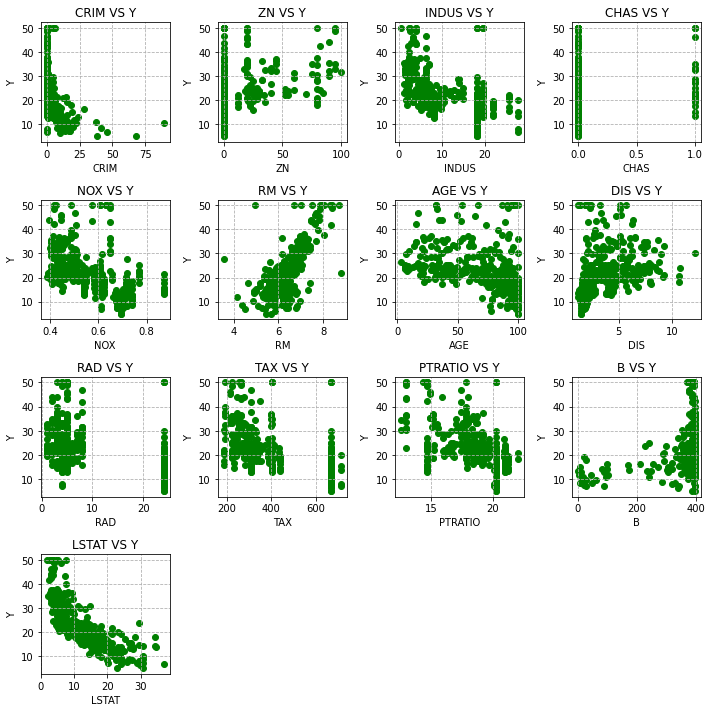

In [ ]:
fig = plt.figure(figsize = (10, 10))

for i in range(len(df.columns) - 1):
  fig.add_subplot(4, 4, i+1)
  plt.scatter(df[df.columns[i]], df['Y'], color = 'green', marker = 'o')
  plt.title(df.columns[i] + ' VS Y')
  plt.xlabel(df.columns[i])
  plt.ylabel('Y')
  plt.grid(ls = '--')

plt.tight_layout()
plt.show()

In [ ]:
import math 

def correlation_coefficient(X, Y):
  
  X, Y = np.array(X), np.array(Y)
  N = len(X)
  return (N*(X*Y).sum() - X.sum()*Y.sum())/ math.sqrt( (N*(X**2).sum() - (X.sum()**2)) * (N*(Y**2).sum() - (Y.sum()**2)) )

In [ ]:
correlation_coefficient(df['NOX'], df['Y'])

-0.4526863019607087

In [ ]:
X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)

df = pd.DataFrame(X_train, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
3,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
4,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79


*Adding **all the Degree 2 features/columns**. So, **Now the number of features will be equal to 13 + 13C2 i.e 91(New Ones) + 13(Old Ones) =  104**.*

In [ ]:
columns = len(df.columns)

for i in range(columns):
  for j in range(i, columns):
    df[df.columns[i] + '*' + df.columns[j]] = df[df.columns[i]] * df[df.columns[j]]

df.shape, df.head()

((379, 104),        CRIM    ZN  INDUS  ...          B*B    B*LSTAT  LSTAT*LSTAT
 0   0.19133  22.0   5.86  ...  151422.1569  7183.3398     340.7716
 1   0.10328  25.0   5.13  ...  157529.6100  3659.4180      85.0084
 2   0.10469  40.0   6.41  ...  151515.5625  2354.9625      36.6025
 3   8.71675   0.0  18.10  ...  153648.3204  6710.6976     293.0944
 4  10.83420   0.0  18.10  ...     465.2649   556.2903     665.1241
 
 [5 rows x 104 columns])

In [ ]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(df.values)

In [ ]:
coef_array, cost_array = batchGD(X_train, Y_train, 0.02, 5000, True)

Streaming output truncated to the last 5000 lines.
Iteration : 2 	 Cost : 3610.8988
Iteration : 3 	 Cost : 2265.1659
Iteration : 4 	 Cost : 1549.9367
Iteration : 5 	 Cost : 1156.4087
Iteration : 6 	 Cost : 928.5754
Iteration : 7 	 Cost : 787.3558
Iteration : 8 	 Cost : 692.4728
Iteration : 9 	 Cost : 623.2683
Iteration : 10 	 Cost : 569.0328
Iteration : 11 	 Cost : 524.1223
Iteration : 12 	 Cost : 485.4867
Iteration : 13 	 Cost : 451.4156
Iteration : 14 	 Cost : 420.8992
Iteration : 15 	 Cost : 393.3012
Iteration : 16 	 Cost : 368.1898
Iteration : 17 	 Cost : 345.2502
Iteration : 18 	 Cost : 324.2374
Iteration : 19 	 Cost : 304.9516
Iteration : 20 	 Cost : 287.2236
Iteration : 21 	 Cost : 270.9071
Iteration : 22 	 Cost : 255.8733
Iteration : 23 	 Cost : 242.0077
Iteration : 24 	 Cost : 229.2080
Iteration : 25 	 Cost : 217.3822
Iteration : 26 	 Cost : 206.4472
Iteration : 27 	 Cost : 196.3279
Iteration : 28 	 Cost : 186.9564
Iteration : 29 	 Cost : 178.2709
Iteration : 30 	 Cost : 170.2

In [ ]:
df = pd.DataFrame(X_test, columns = boston.feature_names)

columns = len(df.columns)

for i in range(columns):
  for j in range(i, columns):
    df[df.columns[i] + '*' + df.columns[j]] = df[df.columns[i]] * df[df.columns[j]]

df.shape, df.head()

((127, 104),        CRIM   ZN  INDUS  ...          B*B    B*LSTAT  LSTAT*LSTAT
 0   0.06724  0.0   3.24  ...  140782.5441  2754.0414      53.8756
 1   9.23230  0.0  18.10  ...  134065.8225  3489.4095      90.8209
 2   0.11425  0.0  13.89  ...  155031.1876  4134.2700     110.2500
 3  24.80170  0.0  18.10  ...  157529.6100  7846.7130     390.8529
 4   0.05646  0.0  12.83  ...  149304.9600  4768.1760     152.2756
 
 [5 rows x 104 columns])

In [ ]:
X_test = scaler.transform(df.values)
X_test = np.hstack([X_test, np.ones((len(X_test), 1))])

In [ ]:
Y_predicted = predict(X_test, coef_array)
Y_predicted

array([22.92286115, 25.53956081, 26.8361043 , 13.28255243, 20.04340569,
       18.04154275, 22.91069367, 20.84730983, 15.22758143, 20.25565362,
        5.16781485, 11.27574507, 14.0013612 , 10.2795035 , 49.24600476,
       33.72889956, 24.6240333 , 38.40749402, 30.9819427 , 22.37425828,
       25.04800287, 22.57182498, 20.05086568, 27.3692374 , 20.91309432,
       19.46724268, 15.57413565, 18.40440557, 43.05267879, 17.73918841,
       16.14036166, 18.20304916, 19.77538432, 19.30946929, 27.06302965,
       14.49764926,  6.02777693, 36.46435953, 14.47364789, 12.52315303,
       23.36961561, 21.25253426, 21.54827262, 17.37203947, 23.51405014,
       23.03650168, 18.1771871 ,  9.18260662, 15.31269894, 24.37629604,
       -7.96446788, 17.69877651, 22.30230222, 40.18626799,  9.71068872,
       18.70586972, 15.0895617 , 19.85796577, 21.10943368, 20.79121296,
       19.34163412, 19.82511401, 31.82723579, 31.40074094, 20.84873593,
       29.24926458, 14.69076077, 16.5573462 , 12.68129971, 22.07

In [ ]:
print('SCORE ON TESTING DATA :', score(X_test, Y_test, coef_array))

SCORE ON TESTING DATA : 0.7201447840243488
